In [1]:
%matplotlib inline

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sbn
from scipy import stats
from weather import city_list, weather_analysis, w_stats
import gmaps
from config import api_key, gkey
# Configure gmaps
gmaps.configure(api_key=gkey)

In [ ]:
# To generate a new set of cities, uncomment the line below and run
# city_list()

In [7]:
weather_data = weather_analysis('./data/out_20190113-164550.csv')

Getting a dataframe from the file ./data/out_20190113-164550.csv...


In [8]:
# Convert the Date (data retrieval) from Epoch to readable time
weather_data['Date(GMT)'] = pd.to_datetime(weather_data['Date'], unit='s').dt.strftime('%m-%d-%Y: %H:%M')
adate = weather_data['Date(GMT)'][0] + ' GMT'
# For statistical analysis, we will consider absolute latitude
weather_data['Absolute Latitude'] = abs(weather_data['Lat'])

weather_data.head()

,City,Humidity,Min Temp,Max Temp,Wind Speed,Cloudiness,Date,Country,Sunrise,Sunset,Lat,Lon,Daytime,Date(GMT),Absolute Latitude
0,Innisfail,79,-6.00,-6.00,1.50,40,1547413200,CA,1547393874,1547423530,52.02,-113.95,Day,01-13-2019: 21:00,52.02
1,Churapcha,0,-45.77,-45.77,1.17,12,1547415950,RU,1547338679,1547360440,62.00,132.43,Night,01-13-2019: 21:45,62.00
2,Odiongan,100,25.81,25.81,7.72,80,1547415950,PH,1547331411,1547372693,12.40,121.99,Night,01-13-2019: 21:45,12.40
3,Luanda,83,26.00,26.00,3.10,40,1547413200,AO,1547355497,1547400812,-8.83,13.24,Night,01-13-2019: 21:00,8.83
4,Kavieng,100,28.58,28.58,5.47,48,1547415784,PG,1547323071,1547367195,-2.57,150.80,Night,01-13-2019: 21:43,2.57


### Testing the distribution of the random cities by plotting latitude/longitude

* Is the distribution of cities even across a range of coordinates (on land masses)?
- Plot out the latitude/longitude of the random sample using Citipy
- While the density of the Citipy sample does not reflect population density, it gives a nice spread across land masses.
** Density can be seen when plotting a random sample of the OWM city (JSON libarary) coordinates

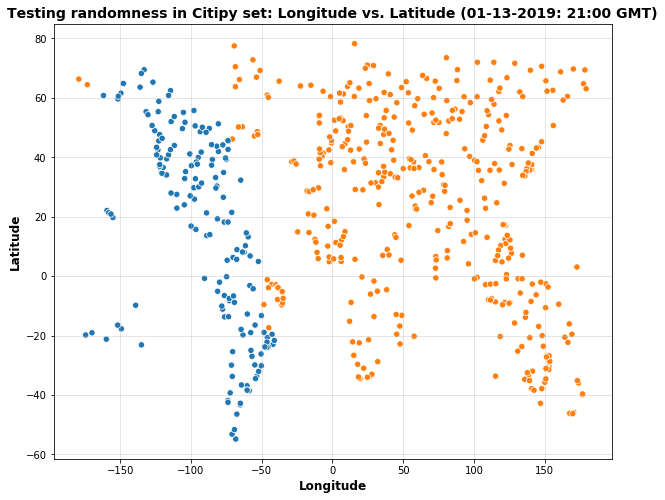

In [9]:
sbn.scatterplot(data=weather_data, x='Lon', y='Lat', hue='Daytime', legend=False, s=40)
fig = plt.gcf()
fig.set_size_inches(10, 8)
fig.ylimit=(-60,45)
fig.xlimit=(-65,85)
plt.grid(alpha=0.4)
plt.xlabel('Longitude', fontsize=12, fontweight='bold')
plt.ylabel('Latitude', fontsize=12, fontweight='bold')
plt.title(f"Testing randomness in Citipy set: Longitude vs. Latitude ({adate})", fontsize=14, fontweight='bold')
plt.savefig('./graphics/Citipy randomness test')

## Temperature vs. Latitude

- Temperature has an inverse relationship to the absolute value of the latitude
- This demonstrates that temperatures do rise as you near the equator
- There was a different slope to the relationship for temperatures measured during the day and night for one sample but not another.
- P-values are significant in all three measures - combined, daytime and nighttime
- When plotting temperature vs. actual latitude, it is apparent that the Northern Hemisphere is much 
colder than Southern Hemisphere - probably because it\'s winter.

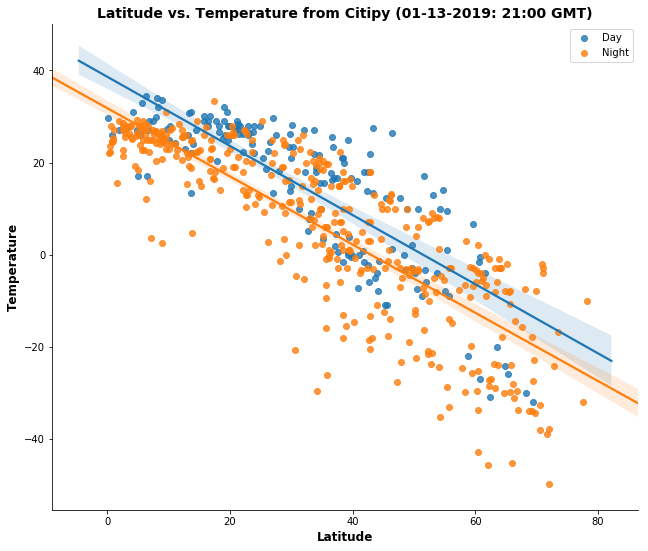

In [10]:
sbn.lmplot(data=weather_data, x='Absolute Latitude', y='Max Temp', hue='Daytime', legend=False)
fig = plt.gcf()
fig.set_size_inches(10, 8)
fig.ylimit=(-60,45)
fig.xlimit=(-65,85)
plt.xlabel('Latitude', fontsize=12, fontweight='bold')
plt.ylabel('Temperature', fontsize=12, fontweight='bold')
plt.title(f"Latitude vs. Temperature from Citipy ({adate})", fontsize=14, fontweight='bold')
plt.legend(loc='best')
plt.savefig('./data/Citipy_temp_abslat.png')

In [11]:
# get coeffs of linear fit for the full dataset
w_stats(weather_data['Absolute Latitude'], weather_data['Max Temp'])

'Slope: -0.753260470592448. Intercept: 34.17411121173983. R: -0.8192100813251423. P: 3.0733149860413786e-140. SE: 0.02204856891555063'

In [12]:
# get coeffs of linear fit for cities that were in nighttime when data was collected
night_df = weather_data.loc[weather_data.Daytime=='Night',:]
w_stats(night_df['Absolute Latitude'], night_df['Max Temp'])

'Slope: -0.7411330017147892. Intercept: 31.83866639426103. R: -0.8295174020362946. P: 9.496904494241074e-104. SE: 0.024886620446007913'

In [13]:
# get coeffs of linear fit for cities that were in daytime when data was collected
day_df = weather_data.loc[weather_data.Daytime=='Day',:]
w_stats(day_df['Absolute Latitude'], day_df['Max Temp'])

'Slope: -0.7513544783487105. Intercept: 38.659353756226565. R: -0.8152608339179771. P: 1.042068524314265e-41. SE: 0.04117585897172351'

In [ ]:
fig, ax = plt.subplots(figsize=(10,8), subplot_kw={'ylim':(-60,45), 'xlim':(-90,90)})
night_df.plot(ax=ax, kind="scatter", x='Lat', y='Max Temp', s=40, color="tab:orange", edgecolor='tab:orange', label='Night')
day_df.plot(ax=ax, kind="scatter", grid=True, x='Lat', y='Max Temp', s=40, color="tab:blue", edgecolors="tab:blue", label='Day')

plt.xlabel('Latitude', fontsize=12, fontweight='bold')
plt.ylabel('Temperature', fontsize=12, fontweight='bold')
plt.title(f"Latitude vs. Temperature from Citipy ({adate})", fontsize=14, fontweight='bold')
plt.legend(loc='best')
plt.savefig('./data/Citipy_temp_lat.png')

## Humidity vs. Latitude

- The dataset had one outlier where humidity was greater than 100 percent, so that was removed
- The relationship between humidity and latitude was not significant for the whole dataset.
- However, there was a significant increase in humidity in cities nearer to the equator at night (P=1.95e-08).
- That increase was not reflected in subsequent runs and could have been the result of a specific weather pattern.
- There was no significant difference in humidity in cities based on latitude during the day .

In [ ]:
#Removing one outlier that had a humidity of 300%
weather_data_f = weather_data[np.abs(weather_data.Humidity-weather_data.Humidity.mean()) <= (3*weather_data.Humidity.std())]


In [ ]:
# Looking at the seaborn plot you can see a trend in the nighttime samples... sort of.
sbn.lmplot(data=weather_data_f, x='Absolute Latitude', y='Humidity', hue='Daytime', legend=True)
fig = plt.gcf()
fig.set_size_inches(10, 8)

In [ ]:
#Removing one outlier that had a humidity of 300%
day_df = day_df[np.abs(day_df.Humidity-day_df.Humidity.mean()) <= (3*day_df.Humidity.std())]


In [ ]:
fig, ax = plt.subplots(figsize=(10,8), subplot_kw={'xlim':(-90,90), 'xlim':(-90,90)})
night_df.plot(ax=ax, kind="scatter", x='Lat', y='Humidity', s=40, color="tab:orange", edgecolor='tab:orange', label='Night')
day_df.plot(ax=ax, kind="scatter", grid=True, x='Lat', y='Humidity', s=40, color="tab:blue", edgecolors="tab:blue", label='Day')

plt.xlabel('Latitude', fontsize=12, fontweight='bold')
plt.ylabel('Humidity', fontsize=12, fontweight='bold')
plt.title(f"Latitude vs. Humidity from Citipy ({adate})", fontsize=14, fontweight='bold')
plt.legend(loc='best')

# plt.legend(loc='best')
plt.savefig('./data/Citipy_humid_lat.png')

#### Cloudiness Plot
- We could find no apparent relationship between cloudiness and latitude or longitude in the dataset in other plots.
- This plot shows the clusters of cloudy regions based on latitude and longitude.
- At the time of data collection, it was cloudy in portions of Canada, South America, Northern Europe
- At the time of data collection it was largely clear across the equator.

In [ ]:
sbn.scatterplot(data=weather_data, x='Lon', y='Lat', hue='Cloudiness')
fig = plt.gcf()
fig.set_size_inches(10, 8)
fig.ylimit=(-60,45)
fig.xlimit=(-65,85)

plt.grid(alpha=0.4)
plt.xlabel('Longitude', fontsize=12, fontweight='bold')
plt.ylabel('Latitude', fontsize=12, fontweight='bold')

plt.legend(loc='best')
plt.title(f"Coordinates vs. Cloudiness from Citipy ({adate})", fontsize=14, fontweight='bold')
# plt.legend(loc='best')
plt.savefig('./data/Citipy_cloud_coord.png')

#### Latitude vs. Wind Speed Plot
- There was no direct relationship between latitude or longitude and wind
- There was a cluster of windiness in Northern Europe and South America.

In [ ]:
sbn.scatterplot(data=weather_data, x='Lon', y='Lat', hue='Wind Speed', legend='brief')
fig = plt.gcf()
fig.set_size_inches(10, 8)
fig.ylimit=(-60,45)
fig.xlimit=(-65,85)
plt.grid(alpha=0.4)
plt.title(f"Latitude vs. Wind Speed from Citipy set ({adate})")
# plt.legend(loc='best')
plt.savefig('./data/Citipy_wind_coord.png')